##week 2




**After getting acquainted with how to build a simple model by Tensorflow, this week we will try to perform some simple classifications on the mnist dataset and predict the image label.**

---

1. **MNIST digits dataset**

    * This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the [MNIST homepage](http://yann.lecun.com/exdb/mnist/).

    * How to import it is as follows.
            from keras.datasets import mnist
            (X_train, y_train), (X_test, y_test) = mnist.load_data("mnist.npz")

2. **Fashion MNIST dataset, an alternative to MNIST**

    * This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

        * How to import it is as follows.

                from keras.datasets import fashion_mnist
                (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

3. **Callbacks API**

    * A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).

    * You can use callbacks to:
        * Write TensorBoard logs after every batch of training to monitor your metrics
        * Periodically save your model to disk
        * Do early stopping
        * Get a view on internal states and statistics of a model during training
        * ...and more

    * Here we only look at the Base Callback class and how to use it. You can go [here](https://keras.io/api/callbacks/) and [here](https://keras.io/api/callbacks/base_callback/) for more information.


4. **sparse_categorical_crossentropy**

    * Computes the crossentropy loss between the labels and predictions.

    * Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided as integers. If you want to provide labels using one-hot representation, please use CategoricalCrossentropy loss. There should be # classes floating point values per feature for y_pred and a single floating point value per feature for y_true.

    * In the snippet below, there is a single floating point value per example for y_true and # classes floating pointing values per example for y_pred. The shape of y_true is [batch_size] and the shape of y_pred is [batch_size, num_classes].


5. **relu**

    * With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.
    
    * Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

    * Dense(64, activation=tf.nn.relu)



6. **softmax**

    * Softmax converts a vector of values to a probability distribution.

    * The elements of the output vector are in range (0, 1) and sum to 1.

    * Each vector is handled independently. The axis argument sets which axis of the input the function is applied along.

    * Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.

    * The softmax of each vector x is computed as exp(x) / tf.reduce_sum(exp(x)).
    
    * Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

    * Dense(64, activation=tf.nn.softmax)



### example_1

MNIST digits dataset

In [ ]:
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Dense,Flatten
from keras import models
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
print(tf.__git_version__)

v2.5.0-0-ga4dfb8d1a71


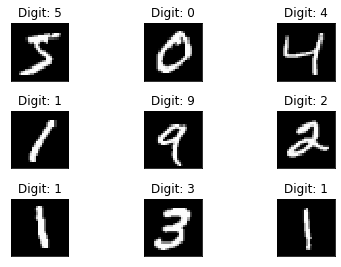

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data("mnist.npz")

X_train = X_train/255
X_test = X_test/255

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

Here is an example of how to use callbacks, in which if the accuracy exceeds 0.99, the model stops spontaneously.




In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') > 0.98):
            print("Reached 90% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
callbacks = myCallback()
model = models.Sequential([
    Flatten(),
    Dense(512, activation = tf.nn.relu),
    Dense(256, activation = tf.nn.relu),
    Dense(128, activation = tf.nn.relu),
    Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs = 8 ,validation_split=0.1, callbacks = [callbacks]
)

print(history.history['accuracy'][-1])

Epoch 1/8
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3489 - accuracy: 0.8898 - val_loss: 0.1071 - val_accuracy: 0.9705
Epoch 2/8
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0924 - accuracy: 0.9728 - val_loss: 0.0762 - val_accuracy: 0.9787
Epoch 3/8
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0593 - accuracy: 0.9820 - val_loss: 0.0933 - val_accuracy: 0.9747
Reached 90% accuracy so cancelling training!
0.9806666374206543


### example_2


Fashion MNIST dataset, an alternative to MNIST

In [ ]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.layers import Dense,Flatten
from keras import models
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
print(tf.__git_version__)

v2.5.0-0-ga4dfb8d1a71


4431872/4422102 [==============================] - 0s 0us/step


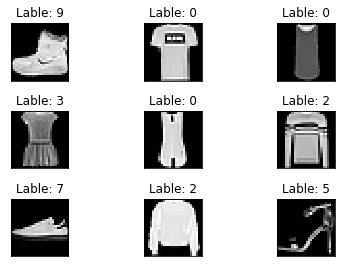

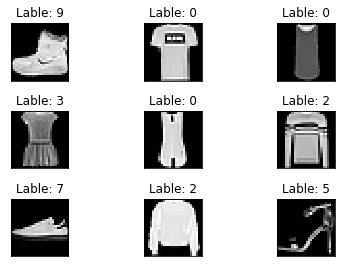

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train/255
X_test = X_test/255

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Lable: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') > 0.90):
            print("Reached 90% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
callbacks = myCallback()
model = models.Sequential([
    Flatten(),
    Dense(256, activation = tf.nn.relu),
    Dense(128, activation = tf.nn.relu),
    Dense(64, activation = tf.nn.relu),
    Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


history = model.fit(X_train, y_train,
                    epochs = 8, validation_data=(X_test,y_test),
                    callbacks = [callbacks]
                    )

print('\n',history.history['accuracy'][-1])

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6235 - accuracy: 0.7756 - val_loss: 0.4317 - val_accuracy: 0.8401
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3687 - accuracy: 0.8655 - val_loss: 0.3848 - val_accuracy: 0.8582
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3247 - accuracy: 0.8809 - val_loss: 0.3583 - val_accuracy: 0.8749
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3048 - accuracy: 0.8883 - val_loss: 0.3604 - val_accuracy: 0.8706
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.8938 - val_loss: 0.3562 - val_accuracy: 0.8700
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2699 - accuracy: 0.8977 - val_loss: 0.3403 - val_accuracy: 0.8787
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9011 - val_loss: 0.3362 - val_accuracy: 0.8785